# 0. Qiskit
Qiskit is a python package for various quantum usage, classical simulation, control of quantum devices for example. There are many other options like cirq from Google, pennylane and so on. In this session, we will use Qiskit for our primary tool for demonstrate of coding quantum algortihms

In [ ]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=eff6c3f9ed919b09a482005d17df135ae7abb151e12c156ef4071daa58213ec7
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556

# 1. Quantum States

## 1.1 Single qubit state

The general state of a qubit ($|q\rangle$) is:

$$
|q\rangle = \alpha|0\rangle + \beta|1\rangle
$$

$$
\alpha, \beta \in \mathbb{C}
$$

(The second line tells us $\alpha$ and $\beta$ are complex numbers). There is a certain requirement for such state to be a valid single-qubit quantum state, which is $|\alpha|^2 + |\beta|^2 = 1$.

$|0\rangle$ and $|1\rangle$ are called computational basis, which is fixed by convention to represent the state. After fixing the vector form of such computational basis, it is usually convenient to represent the state with state vector.

For example, if we fix $|0\rangle$ to be vector $[1, 0]$ and $|1\rangle$ to be $[0, 1]$, then the state can be written as $[\alpha, \beta]$.

## 1.2 Bloch sphere
To further explain what a quantum state is, we need to dive deeply into what $\alpha$ and $\beta$ can be.

Firstly, since global phase can be ignored, we can only measure the difference in phase between the states $|0\rangle$ and $|1\rangle$. The reason behind that is if we seperate the real and imaginary part of amplitudes $\alpha$ and $\beta$, the state can be written as:
$$
|q\rangle = e^{i\phi_a}\alpha|0\rangle + e^{i\phi_b}\beta|1\rangle
$$
here $i$ is the complex number with $i^2=-1$, and now $\alpha$, $\beta$, $\phi_a$, $\phi_b$ will all be real. We can also rewriting it as:
$$
|q\rangle = e^{i\phi_a}[\alpha|0\rangle + e^{i(\phi_b-\phi_a)}\beta|1\rangle]
$$
Then we can see that, by dropping $e^{i\phi_a}$, there will be no effect physically, thus we can drop it but only keep the relative phase $e^{i(\phi_b-\phi_a)}$ and rewrite it as $e^{i\phi}$:

$$
|q\rangle = \alpha|0\rangle + e^{i\phi}\beta|1\rangle
$$

$$
\alpha, \beta, \phi \in \mathbb{R}
$$

Finally, since the qubit state must be normalised, i.e.

$$
\alpha^2 + \beta^2 = 1
$$

we can use the trigonometric identity:

$$
\sin^2{x} + \cos^2{x} = 1
$$

to describe the real $\alpha$ and $\beta$ in terms of one variable, $\theta$:

$$
\alpha = \cos{\tfrac{\theta}{2}}, \quad \beta=\sin{\tfrac{\theta}{2}}
$$

From this we can describe the state of any qubit using the two variables $\phi$ and $\theta$:

$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

$$
\theta, \phi \in \mathbb{R}
$$

We want to plot our general qubit state:

$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

If we interpret $\theta$ and $\phi$ as spherical co-ordinates ($r = 1$, since the magnitude of the qubit state is $1$), we can plot any single qubit state on the surface of a sphere, known as the _Bloch sphere._

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Bloch_sphere.svg/1920px-Bloch_sphere.svg.png" alt="bloch sphere" width="400"/>

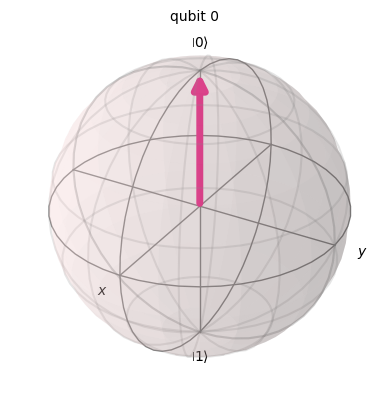

In [ ]:
## Introduce qiskit quantum state
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from math import sqrt, pi

state = Statevector([1, 0])
plot_bloch_multivector(state)

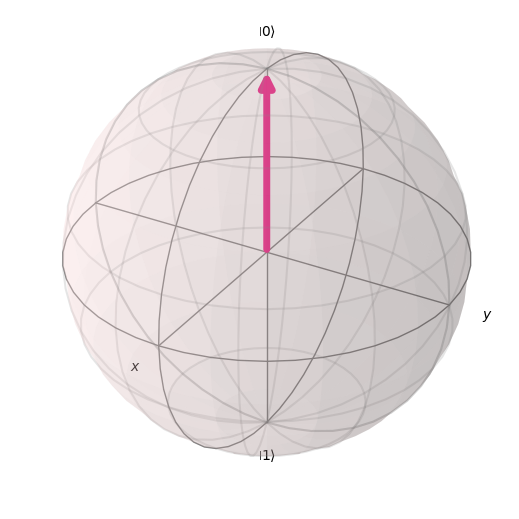

In [ ]:
coords = [1, 0, 0] # [Radius, Theta, Phi] radius is fixed to be 1
plot_bloch_vector(coords, coord_type='spherical')

### Exercise 1:
Please plot a bloch vector figure of state $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle$) using both the function `plot_bloch_vector` with state vector and  the function `plot_bloch_vector` with spherical coordinates.

In [ ]:
# Statevector version
state_vec = [,] # alpha, beta
plot_bloch_multivector(state_vec)


In [ ]:
coords = [1, , ] # [Radius, Theta, Phi]
plot_bloch_vector(coords, coord_type='spherical')

## 1.3 Multi-qubit state

Then for state with multiple qubits, we can deduct it accordingly. Take two-qubit states for example, since there are two qubits, and the dimension to describe each qubit will be 2, the overall dimension to describe two-qubit state will be $2\times2=4$. In general, for $n$-qubit quantum state, the length of state vector will be $2^n$, and the requirement of such quantum state will be, the squared sum of all elements in such state vector will be 1.

A two-qubit state can be written as:
$$
|q\rangle = a|00\rangle + b|01\rangle + c|10\rangle + d|11\rangle
$$
as you can imagine, here $|00\rangle$ is one computational basis for two-qubit state, and it is simply the tensor product of computational basis $|0\rangle$ of each qubit.
$$
|00\rangle = |0\rangle \otimes |0\rangle = [1, 0] \otimes [1, 0] = [1, 0, 0, 0]
$$

Then it is straightforward to deduct the vector form of other computational basis as $|01\rangle=[0, 1, 0, 0]$, $|10\rangle=[0, 0, 1, 0]$ and $|11\rangle=[0, 0, 0, 1]$, from which we can represent the two-qubit state as
$$
|q\rangle = [a, b, c, d]
$$

We can use the `plot_bloch_multivector` to visualize the multi-qubit state, here is an example for visualizing $|00\rangle$

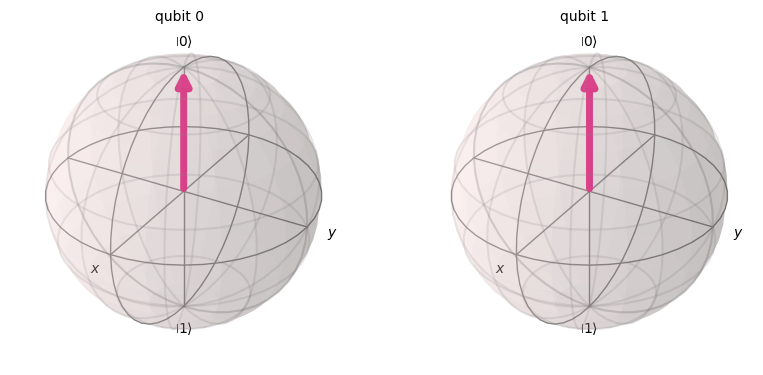

In [ ]:
state = Statevector([1, 0, 0, 0])
plot_bloch_multivector(state)

### Exercise 2:

Please plot a bloch vector figure of state $\frac{1}{\sqrt{2}}(|00\rangle + |01\rangle$) using the function `plot_bloch_multivector`

In [ ]:
state = Statevector([, , ,])
plot_bloch_multivector(state)

# 2. Quantum Gates

Quantum gates are quantum operations what are used to change the quantum state. It needs to be unitary to keep the properties of quantum state, which means for a quantum gate $U$, $U^\dagger U=1$, where $\dagger$ is the conjugate transpose. In the following we will give specific examples of different quantum gates and their utilities.

## 2.1 The Pauli Gates
Pauli gates are ones represented by Pauli matrices.

### 2.1.1 The X-Gate
The X-gate is represented by the Pauli-X matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = 0\times|0\rangle\langle0| + 1\times|0\rangle\langle1| + 1\times|1\rangle\langle0| + 0\times|1\rangle\langle1|$$
here $|0\rangle\langle0|$ is the outer product opeartion where
$$
|0\rangle\langle0| = \begin{bmatrix} 1 \\ 0 \end{bmatrix} [ 1\quad 0 ] = \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix}
$$

To see the effect a gate has on a qubit, we simply multiply the qubit’s statevector by the gate. We can see that the X-gate switches the amplitudes of the states $|0\rangle$ and $|1\rangle$:

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$

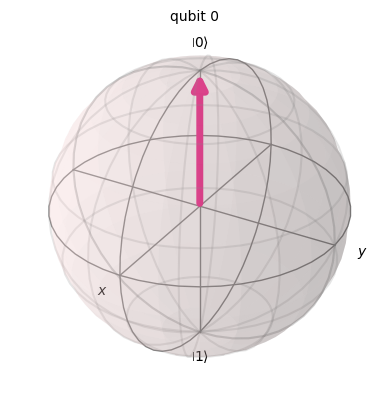

In [ ]:
qc = QuantumCircuit(1) # initalize a single-qubit state to be |0>
plot_bloch_multivector(Statevector(qc))

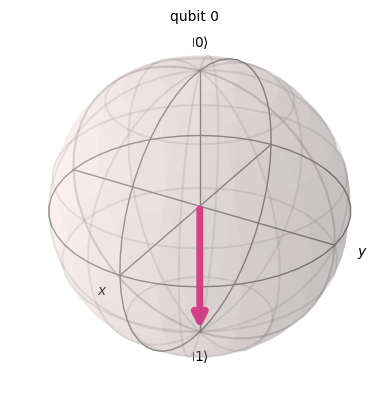

In [ ]:
qc.x(0) # apply X gate to flip the qubit to |1>
plot_bloch_multivector(Statevector(qc))

### 2.1.2 The Y & Z-gates
Similarly to the X-gate, the Y & Z Pauli matrices also act as the Y & Z-gates in our quantum circuits:


$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = -i|0\rangle\langle1| + i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$

Then the operation they done to the computational basis will be
$$
\begin{aligned}
&Y|0\rangle = i|1\rangle \\
&Y|1\rangle = -i|0\rangle \\
&Z|0\rangle = |0\rangle \\
&Z|1\rangle = -|1\rangle
\end{aligned}
$$

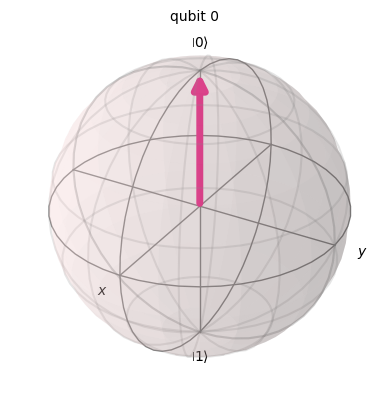

In [ ]:
qc.z(0)
qc.y(0)
plot_bloch_multivector(Statevector(qc))

## 2.2 The Hadamard Gate

The Hadamard gate (H-gate) is a fundamental quantum gate. It allows us to move away from the poles of the Bloch sphere and create a superposition of $|0\rangle$ and $|1\rangle$. It has the matrix:

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

We can see that this performs the transformations below:

$$ H|0\rangle = |+\rangle  = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)$$

$$ H|1\rangle = |-\rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)$$

This can be thought of as transforming the state of the qubit between the X and Z bases.

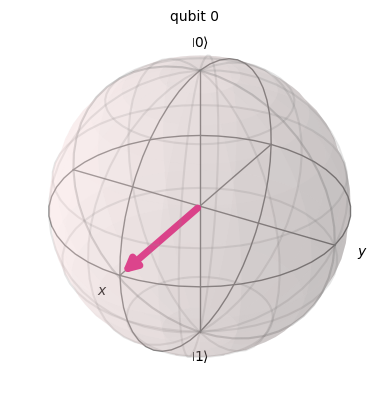

In [ ]:
qc = QuantumCircuit(1) # initalize a single-qubit state to be |0>
qc.h(0) # apply H gate to create a superposition state
plot_bloch_multivector(Statevector(qc))

## 2.3 The S-gates

The next gate to mention is the S-gate (sometimes known as the $\sqrt{Z}$-gate). It does a quarter-turn around the Bloch sphere. It is important to note that unlike every gate introduced in this chapter so far, the S-gate is **not** its own inverse! As a result, you will often see the S<sup>†</sup>-gate, (also “S-dagger”, “Sdg” or $\sqrt{Z}^\dagger$-gate).:

$$ S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix}, \quad  S^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix}$$

The name "$\sqrt{Z}$-gate" is due to the fact that two successively applied S-gates has the same effect as one Z-gate:

$$ SS|q\rangle = Z|q\rangle $$

This notation is common throughout quantum computing.

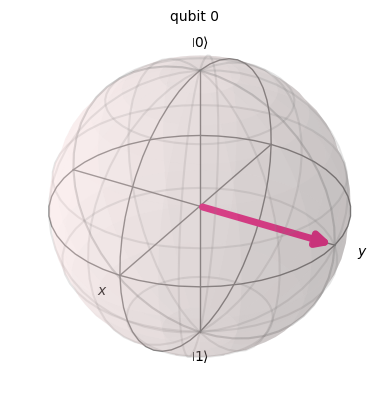

In [ ]:
qc.s(0)
plot_bloch_multivector(Statevector(qc))

## 2.4 CNOT gates
When our qubits are not in superposition of $|0\rangle$ or $|1\rangle$ (behaving as classical bits), this gate is very simple and intuitive to understand. We can use the classical truth table:

| Input (t,c) | Output (t,c) |
|:-----------:|:------------:|
| 00          | 00           |
| 01          | 11           |
| 10          | 10           |
| 11          | 01           |

And acting on our 4D-statevector, it has one of the two matrices:

$$
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
                              0 & 1 & 0 & 0 \\
              \end{bmatrix}, \quad
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 1 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
              \end{bmatrix}
$$

depending on which qubit is the control and which is the target. Different books, simulators and papers order their qubits differently. In our case, the left matrix corresponds to the CNOT in the circuit above. This matrix swaps the amplitudes of $|01\rangle$ and $|11\rangle$ in our statevector:

$$
|a\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix}, \quad \text{CNOT}|a\rangle = \begin{bmatrix} a_{00} \\ a_{11} \\ a_{10} \\ a_{01} \end{bmatrix} \begin{matrix} \\ \leftarrow \\ \\ \leftarrow \end{matrix}
$$

We have seen how this acts on classical states, but let’s now see how it acts on a qubit in superposition. We will put one qubit in the state $|+\rangle$:

<ipython-input-14-ba4780a43353>:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(0, 1)


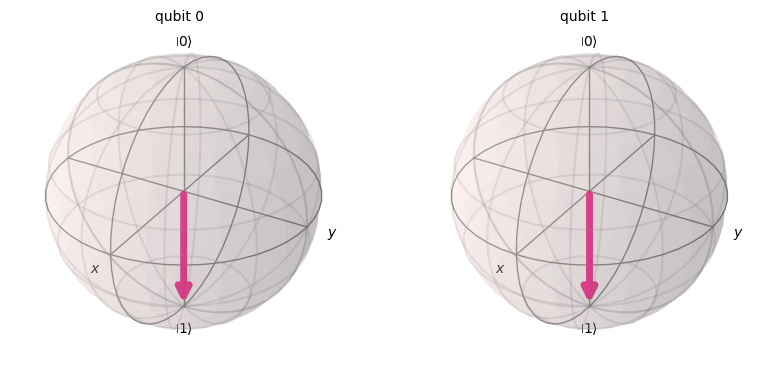

In [ ]:
qc = QuantumCircuit(2) # initalize a two-qubit state to be |00>
qc.x(0) # apply H gate to create a superposition state
qc.cnot(0, 1)
plot_bloch_multivector(Statevector(qc))

### Exercise 3:
Given a two-qubit state initialized at $|11\rangle$, firstly use a single-qubit gate to make it $|10\rangle$, and then use a two-qubit gate to make it back again to $|11\rangle$. Verify your results using `plot_bloch_multivector` function.

In [ ]:
qc_exercise = QuantumCircuit(2) # initalize a two-qubit state to be |00>
qc_exercise.x(0)
qc_exercise.x(1) # make it |11>
qc_exercise. # one-qubit gate here
plot_bloch_multivector(Statevector(qc_exercise))
qc_exercise. # two-qubit gate here
plot_bloch_multivector(Statevector(qc_exercise))

## 2.5 Variational Gates

### 2.5.1 Rz Gate
Another useful single-qubit gate is the variational single-qubit rotation gate, for example, Rz gate, which characterize Single-qubit rotation about the Z axis.
$$\text{Rz}(\lambda) = \exp(-i\frac{\lambda}{2}Z) = \begin{bmatrix} e^{-i\frac{\lambda}{2}} & 0 \\ 0 & e^{i\frac{\lambda}{2}} \end{bmatrix} $$

### 2.5.2 Controlled-Rz Gate

There are also variational gates for two-qubit state, one of them will be controlled rotation gate. Here we give an example of controlled-Rz gate
$$
        CRZ(\lambda)\ q_0, q_1 =
            I \otimes |0\rangle\langle 0| + RZ(\lambda) \otimes |1\rangle\langle 1| =
            \begin{bmatrix}
                1 & 0 & 0 & 0 \\
                0 & e^{-i\frac{\lambda}{2}} & 0 & 0 \\
                0 & 0 & 1 & 0 \\
                0 & 0 & 0 & e^{i\frac{\lambda}{2}}
            \end{bmatrix}
$$

# 3. Measurement
Due to the characteristic of quantum system, we can not obtain state-vector in the real world, but only retrieve information by performing measurements. Measurements will usually be performed at computational basis, which will collapse the quantum state to be the specific basis, according to the coefficient of basis.
## 3.1 Retrieve Statistical Distribution from the State
For a single-qubit gate $|q\rangle=\alpha|0\rangle+\beta|1\rangle$, if we perform measurements on the computational basis $|0\rangle$ and $|1\rangle$, the probability of getting each basis will be $|\alpha|^2$ and $|\beta|^2$ respectively.

{'0': 5557, '1': 4443}

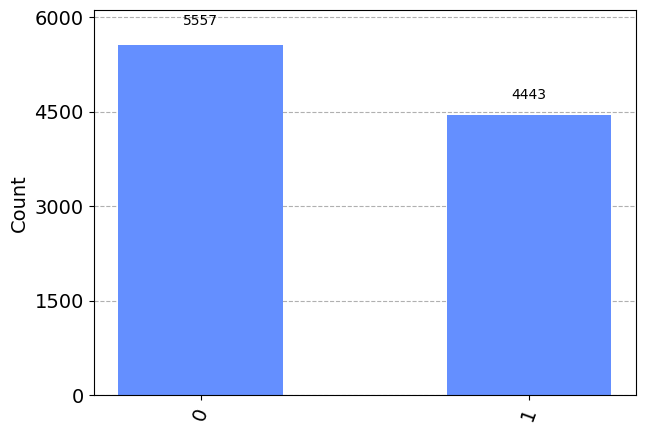

In [ ]:
state = Statevector([(1+2j)/3, -2/3]) #|(1+2j)/3|^2 = 5/9 ~ 0.56 |-2/3|^2 = 4/9 ~ 0.44
statistics = state.sample_counts(shots=10000)
display(statistics)
plot_histogram(statistics)

## 3.2 Obtain Expectation Values

For some cases, we can not determine the state merely from measurements on computational basis. For example, $|+\rangle$ and $|-\rangle$.
Consequently we need to estimate expectation values based on such quantum state.

$$
E(O) = \langle q|O|q\rangle
$$

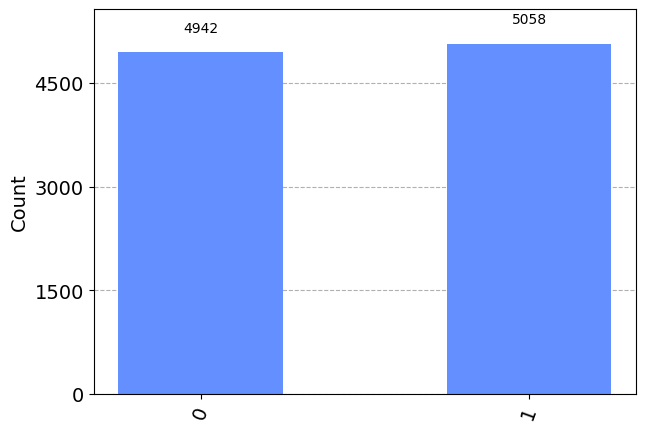

In [ ]:
state_plus = Statevector([1/sqrt(2), 1/sqrt(2)])
state_minus = Statevector([1/sqrt(2), -1/sqrt(2)])
stat_plus = state_plus.sample_counts(shots=10000)
plot_histogram(stat_plus)

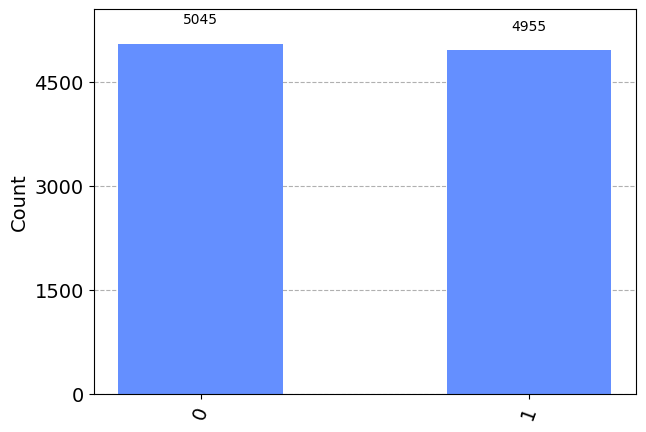

In [ ]:
stat_minus = state_minus.sample_counts(shots=10000)
plot_histogram(stat_minus)

In [ ]:
from qiskit.quantum_info import Operator
H = Operator([[1/sqrt(2), 1/sqrt(2)], [1/sqrt(2), -1/sqrt(2)]])
statistics = state_plus.expectation_value(H)
display(statistics)

(0.7071067811865474+0j)

In [ ]:
statistics = state_minus.expectation_value(H)
display(statistics)

(-0.7071067811865474+0j)

# 4 Quantum Circuits
Quantum Circuits are composed of quantum gates to exert specific unitary operations to the init quantum state, there are numerous circuits for different applications, here we will introduce three of them to get you started.
## 4.1 Bell State Generation
_Bell_ state is probably the most famous quantum state, which is $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$. We can see that this state has 50% probability of being measured in the state $|00\rangle$, and 50% chance of being measured in the state $|11\rangle$. Most interestingly, it has a **0%** chance of being measured in the states $|01\rangle$ or $|10\rangle$. We can use the following circuit to generate the Bell state.

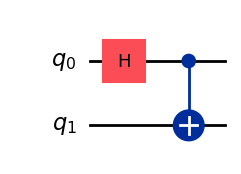

In [ ]:
from qiskit import QuantumCircuit, Aer
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization import array_to_latex
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw('mpl', style='iqp')

In [ ]:
# Let's see the result:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
final_state = svsim.run(qc).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

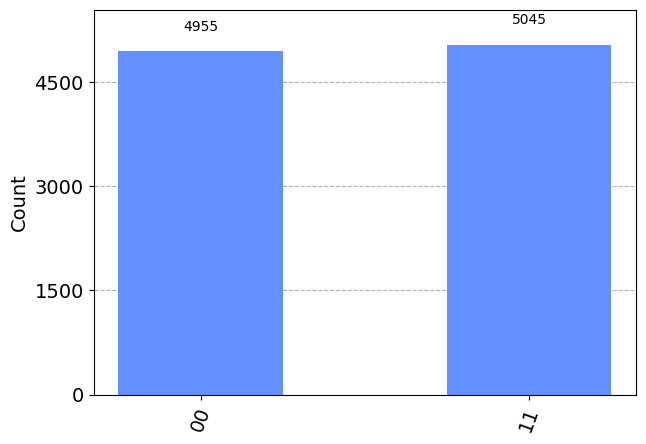

In [ ]:
qc.measure_all()
result = svsim.run(qc, shots=10000).result()
plot_histogram(result.get_counts())

### Exercise 4:
There are different kinds of Bell State. Create one of them $\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$ and validate you have done it correctly using state vector.

In [ ]:
qc = QuantumCircuit(2)
# some circuits here
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
final_state = svsim.run(qc).result().get_statevector()
# Print the statevector:
array_to_latex(final_state, prefix="\\text{Statevector = }")

## 4.2 Teleportation

### 4.2.1 Overview
Alice wants to send quantum information to Bob. Specifically, suppose she wants to send the qubit state
$\vert\psi\rangle = \alpha\vert0\rangle + \beta\vert1\rangle$.
This entails passing on information about $\alpha$ and $\beta$ to Bob.

There exists a theorem in quantum mechanics which states that you cannot simply make an exact copy of an unknown quantum state. This is known as the no-cloning theorem. As a result of this we can see that Alice can't simply generate a copy of $\vert\psi\rangle$ and give the copy to Bob.

However, by taking advantage of two classical bits (registers) and an entangled qubit pair, Alice can transfer her state $\vert\psi\rangle$ to Bob. We call this teleportation because, at the end, Bob will have $\vert\psi\rangle$ and Alice won't anymore.

### 4.2.2 The Protocol
To transfer a quantum bit, Alice and Bob must use a third party (Telamon) to send them an entangled qubit pair. Alice then performs some operations on her qubit, sends the results to Bob over a classical communication channel, and Bob then performs some operations on his end to receive Alice’s qubit.

We will describe the steps on a quantum circuit below. Here, no qubits are actually ‘sent’, you’ll just have to imagine that part!

First we set up our session:

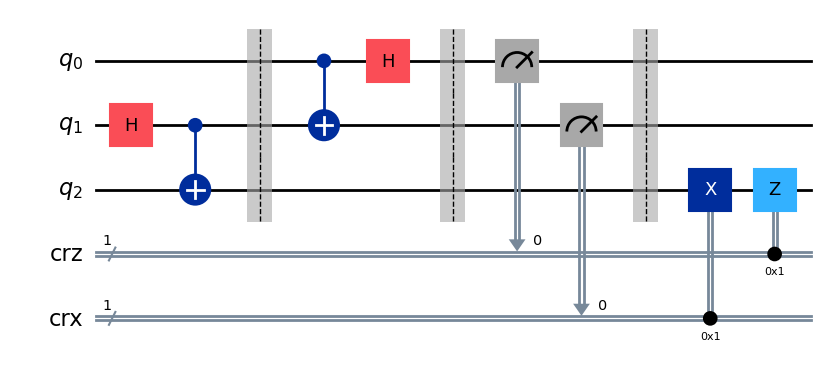

In [ ]:
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector

def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target

def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers
    qc.z(qubit).c_if(crz, 1) # are in the state '1'

## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
measure_and_send(teleportation_circuit, 0, 1)

## STEP 4
teleportation_circuit.barrier() # Use barrier to separate steps
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw('mpl', style='iqp')

#### Step 1
A third party, Telamon, creates an entangled pair of qubits and gives one to Bob and one to Alice.

The pair Telamon creates is a special pair called a Bell pair. In quantum circuit language, the way to create a Bell pair between two qubits is to first transfer one of them to the X-basis ($|+\rangle$ and $|-\rangle$) using a Hadamard gate, and then to apply a CNOT gate onto the other qubit controlled by the one in the X-basis.

Let's say Alice owns $q_1$ and Bob owns $q_2$ after they part ways.

#### Step 2

Alice applies a CNOT gate to $q_1$, controlled by $\vert\psi\rangle$ (the qubit she is trying to send Bob). Then Alice applies a Hadamard gate to $|\psi\rangle$. In our quantum circuit, the qubit ($|\psi\rangle$) Alice is trying to send is $q_0$:

#### Step 3

Next, Alice applies a measurement to both qubits that she owns, $q_1$ and $\vert\psi\rangle$, and stores this result in two classical bits. She then sends these two bits to Bob.

#### Step 4

Bob, who already has the qubit $q_2$, then applies the following gates depending on the state of the classical bits:

00 $\rightarrow$ Do nothing

01 $\rightarrow$ Apply $X$ gate

10 $\rightarrow$ Apply $Z$ gate

11 $\rightarrow$ Apply $ZX$ gate

(*Note that this transfer of information is purely classical*.)

And voila! At the end of this protocol, Alice's qubit has now teleported to Bob. Why is that, let's deduct mathematically step by step.

$$
\begin{aligned}
\alpha|000\rangle + \beta |100\rangle & \rightarrow \frac{\alpha}{\sqrt{2}} (|000\rangle + |010\rangle ) + \frac{\beta}{\sqrt{2}} (|100\rangle + |110\rangle )\\
& \rightarrow \frac{\alpha}{\sqrt{2}} (|000\rangle + |011\rangle ) + \frac{\beta}{\sqrt{2}} (|100\rangle + |111\rangle ) \\
& \rightarrow \frac{\alpha}{\sqrt{2}} (|000\rangle + |011\rangle ) + \frac{\beta}{\sqrt{2}} (|110\rangle + |101\rangle ) \\
& \rightarrow \frac{\alpha}{\sqrt{2}} [\frac{1}{\sqrt{2}}(|000\rangle + |100\rangle) + \frac{1}{\sqrt{2}}(|011\rangle + |111\rangle)] + \frac{\beta}{\sqrt{2}} [\frac{1}{\sqrt{2}}(|010\rangle - |110\rangle) + \frac{1}{\sqrt{2}}(|001\rangle - |101\rangle)] \\
& = \frac{1}{2}[|00\rangle (\alpha|0\rangle + \beta |1\rangle) + |10\rangle (\alpha|0\rangle - \beta |1\rangle) + |01\rangle (\alpha|1\rangle + \beta |0\rangle) + |11\rangle (\alpha|1\rangle - \beta |0\rangle)]
\end{aligned}
$$

### Exercise 5:
Suppose Alice have a $|+\rangle$ state, use the teleportation circuit to transfer it to Bob.



## 4.3 Variational Quantum Circuits

Parameterized quantum circuits, where the gates are defined through tunable parameters, are a fundamental building block of near-term quantum machine learning algorithms. In the literature, depending on the context, parameterized quantum circuits are also called parameterized trial states, variational forms, or ansatzes.

Here is an example of a simple parameterized circuit, with two parameterized gates, a single-qubit $z$-rotation gate, with a variable rotation $\theta$, followed by a two-qubit controlled $z$-rotation gate, with the same variable rotation $\theta$:

We can create the parameterized circuit above using the `QuantumCircuit` and `Parameter` classes. The `Parameter` class lets us add rotation gates, without having to specify what the angles are yet:

In [ ]:
from qiskit.circuit import QuantumCircuit, Parameter
theta = Parameter('θ')

qc = QuantumCircuit(2)
qc.rz(theta, 0)
qc.crz(theta, 0, 1)
qc.draw('mpl', style='iqp')

If we want the gates to have different parameters, we can use two `Parameters`, or we create a `ParameterVector`, which acts like a list of `Parameters`:

In [ ]:
from qiskit.circuit import ParameterVector
theta_list = ParameterVector('θ', length=2)

qc = QuantumCircuit(2)
qc.rz(theta_list[0], 0)
qc.crz(theta_list[1], 0, 1)
qc.draw('mpl', style='iqp')

As all quantum gates used in a quantum circuit are [unitary](gloss:unitary), a parameterized circuit itself can be described as a unitary operation on $n$ qubits, $\mathbf{U_\theta}$, acting on some initial state $|\phi_0\rangle$, often set to $|0\rangle^{\otimes n}$. The resulting parameterized quantum state is $|\psi_\mathbf{\theta}\rangle = \mathbf{U_\theta} |\phi_0\rangle$ where $\mathbf{\theta}$ is a set of tunable parameters.